***Artifical Intelligence and Data Science - I mini project on
Dry bean dataset and performing EDA(Exploratory data analysis) on it.***


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
import seaborn as sns
from matplotlib import pyplot as plt

*imports from sklearn for cross-validation,finding accuracy and preprocessing the data*

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,StratifiedShuffleSplit,GridSearchCV
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score,accuracy_score,roc_curve,roc_auc_score

**Selecting model**

In [ ]:
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

**<h2>Reading the dataset</h2>**



In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dry_Bean_Dataset.xlsx")
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [ ]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [ ]:
df["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [ ]:
print("The shape and size of the data set is",df.shape,",",df.size)

The shape and size of the data set is (13611, 17) , 231387


**Droping the duplicates if any**

***After dropping the duplicates the dataset count is reduced from 13611 to 13543***

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13543.000000  13543.000000     13543.000000     13543.000000   
mean    53048.460385    854.993406       319.895602       202.365321   
std     29392.438324    214.722684        85.809260        45.051632   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36282.500000    703.230000       253.086806       175.886357   
50%     44580.000000    793.896000       296.404589       192.491117   
75%     61382.000000    977.146500       376.312489       217.245403   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13543.000000  13543.000000   13543.000000   13543.000000  13543.000000   
mean       1.581075      0.750315   53767.986709     253.034094      0.749829   
std        0.245245      0.091858   29844.248525      59.307709      0.048939   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.430662      0.715144   36673.000000     214.933277      0.718735   
50%        1.549860      0.763997   45122.000000     238.245711      0.759903   
75%        1.703916      0.809671   62360.000000     279.560351      0.786849   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13543.000000  13543.000000  13543.000000  13543.000000  13543.000000   
mean       0.987152      0.873671      0.800352      0.006561      0.001719   
std        0.004650      0.059393      0.061464      0.001130      0.000595   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985678      0.833410      0.763228      0.005893      0.001158   
50%        0.988288      0.883490      0.801514      0.006643      0.001700   
75%        0.990019      0.917031      0.834470      0.007270      0.002173   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13543.000000  13543.000000  
mean       0.644341      0.995078  
std        0.098653      0.004347  
min        0.410339      0.947687  
25%        0.582517      0.993720  
50%        0.642424      0.996393  
75%        0.696341      0.997891  
max        0.974767      0.999733

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

In [ ]:
df[:4]

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER

Categorical_col-->y-label(labels/attributes) </br>
Continuous_col-->x-label(features)

In [ ]:
Categorical_col=["Class"]
Continuous_col=["Area","Perimeter","MajorAxisLength","MinorAxisLength","AspectRation",
                "EquivDiameter","Extent","Solidity","roundness","Compactness","ShapeFactor1","ShapeFactor2","ShapeFactor3","ShapeFactor4"]

In [ ]:
df.isna().all()

Area               False
Perimeter          False
MajorAxisLength    False
MinorAxisLength    False
AspectRation       False
Eccentricity       False
ConvexArea         False
EquivDiameter      False
Extent             False
Solidity           False
roundness          False
Compactness        False
ShapeFactor1       False
ShapeFactor2       False
ShapeFactor3       False
ShapeFactor4       False
Class              False
dtype: bool

In [ ]:
df[Continuous_col].describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13543.000000  13543.000000     13543.000000     13543.000000   
mean    53048.460385    854.993406       319.895602       202.365321   
std     29392.438324    214.722684        85.809260        45.051632   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36282.500000    703.230000       253.086806       175.886357   
50%     44580.000000    793.896000       296.404589       192.491117   
75%     61382.000000    977.146500       376.312489       217.245403   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  AspectRation  EquivDiameter        Extent      Solidity  \
count  13543.000000  13543.000000   13543.000000  13543.000000  13543.000000   
mean       1.581075      1.581075     253.034094      0.749829      0.987152   
std        0.245245      0.245245      59.307709      0.048939      0.004650   
min        1.024868      1.024868     161.243764      0.555315      0.919246   
25%        1.430662      1.430662     214.933277      0.718735      0.985678   
50%        1.549860      1.549860     238.245711      0.759903      0.988288   
75%        1.703916      1.703916     279.560351      0.786849      0.990019   
max        2.430306      2.430306     569.374358      0.866195      0.994677   

          roundness   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  \
count  13543.000000  13543.000000  13543.000000  13543.000000  13543.000000   
mean       0.873671      0.800352      0.006561      0.001719      0.644341   
std        0.059393      0.061464      0.001130      0.000595      0.098653   
min        0.489618      0.640577      0.002778      0.000564      0.410339   
25%        0.833410      0.763228      0.005893      0.001158      0.582517   
50%        0.883490      0.801514      0.006643      0.001700      0.642424   
75%        0.917031      0.834470      0.007270      0.002173      0.696341   
max        0.990685      0.987303      0.010451      0.003665      0.974767   

       ShapeFactor4  
count  13543.000000  
mean       0.995078  
std        0.004347  
min        0.947687  
25%        0.993720  
50%        0.996393  
75%        0.997891  
max        0.999733

In [ ]:
df[Categorical_col].describe()

Class
count      13543
unique         7
top     DERMASON
freq        3546

**<h1>EDA-Exploratory Data Analysis</h1>**

<ipython-input-17-f5c7bc90a045>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(8,2,i)
<ipython-input-17-f5c7bc90a045>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(8,2,i)
<ipython-input-17-f5c7bc90a045>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(8,2,i)
<ipython-input-17-f5c7bc90a045>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(8,2,i)
<ipython-input-17-f5c7bc90a045>:6: MatplotlibDeprecationWarning: Auto-remova

ValueError: ignored

<Figure size 640x480 with 0 Axes>

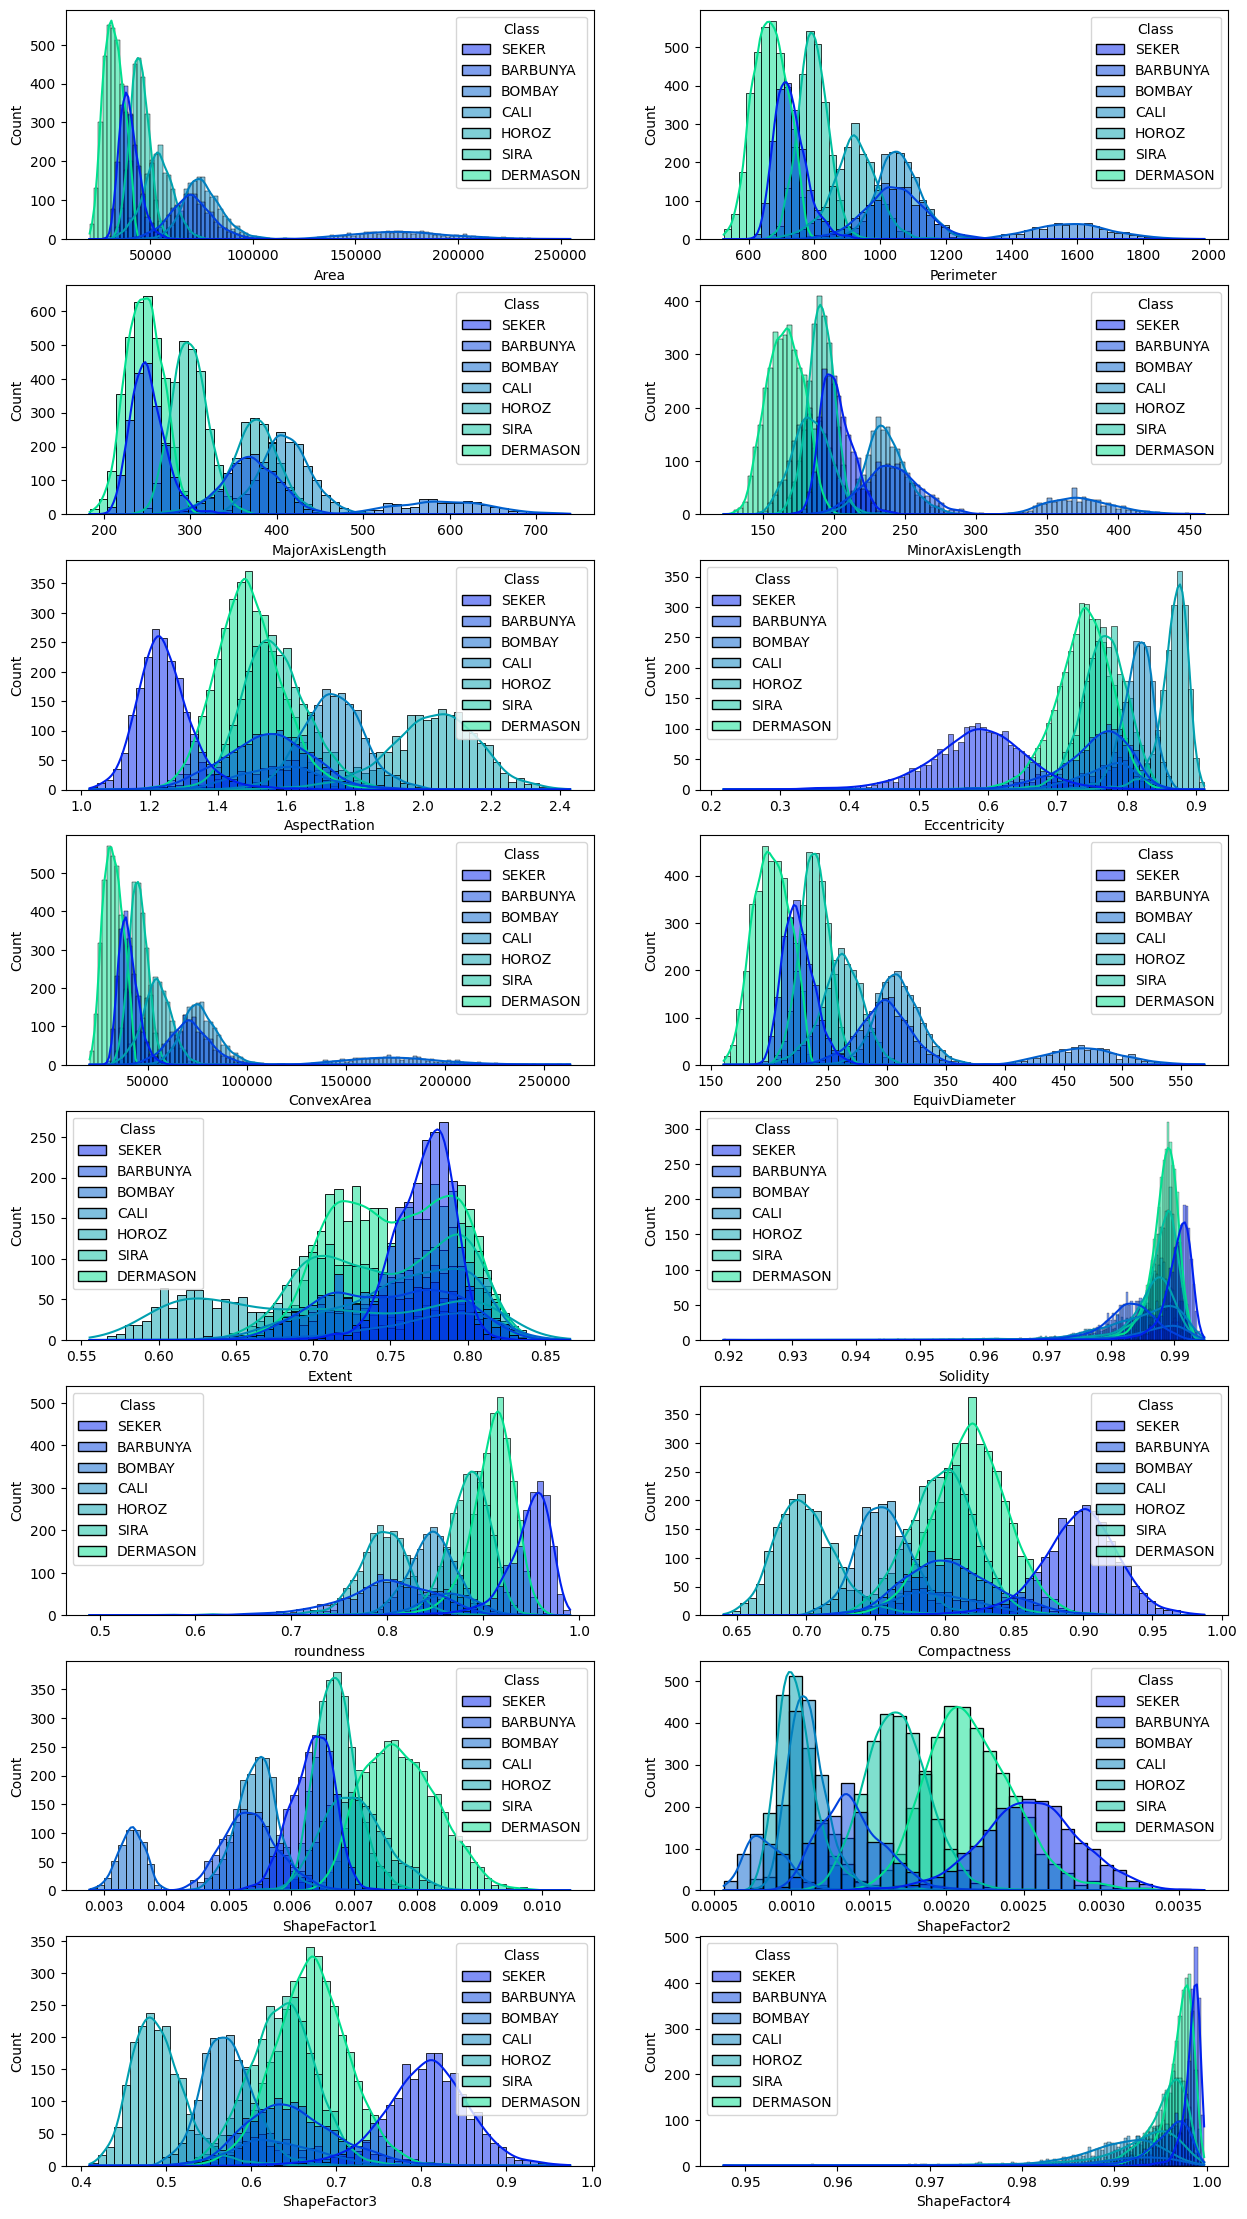

In [ ]:

plt.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(6, 2, figsize=(15,28))
color='winter'
i=1
for feature in df.columns :
  ax=plt.subplot(8,2,i)
  sns.histplot(data=df,x=feature,kde=True,hue="Class",palette=color,ax=ax)
  i+=1
plt.suptitle("Dry Bean EDA")

In [ ]:
def detect_outliers(label=None):
  q1=df[label].quantile(0.25)
  q3=df[label].quantile(0.75)
  IQR=q3-q1
  interval=((df[label] > q1 - 1.5*IQR) & (df[label] < q3 + 1.5*IQR ))
  return df[interval],df[~interval]

In [ ]:
def assign_mean(df_out,not_df_out,label=None):
  df.loc[df_out[df_out["Class"] == "DERMASON"].index, label] = not_df_out[not_df_out["Class"] == "DERMASON"][label].mean()
  df.loc[df_out[df_out["Class"] == "SIRA"].index, label] = not_df_out[not_df_out["Class"] == "SIRA"][label].mean()
  df.loc[df_out[df_out["Class"] == "SEKER"].index, label] = not_df_out[not_df_out["Class"] == "SEKER"][label].mean()
  df.loc[df_out[df_out["Class"] == "HOROZ"].index, label] = not_df_out[not_df_out["Class"] == "HOROZ"][label].mean()
  df.loc[df_out[df_out["Class"] == "CALI"].index, label] = not_df_out[not_df_out["Class"] == "CALI"][label].mean()
  df.loc[df_out[df_out["Class"] == "BARBUNYA"].index, label] = not_df_out[not_df_out["Class"] == "BARBUNYA"][label].mean()
  df.loc[df_out[df_out["Class"] == "BOMBAY"].index, label] = not_df_out[not_df_out["Class"] == "BOMBAY"][label].mean()
  return

{'whiskers': [<matplotlib.lines.Line2D at 0x7f098b8837f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f098b74fe50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f098b883c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f098b74f880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f098b74f190>],
 'means': []}

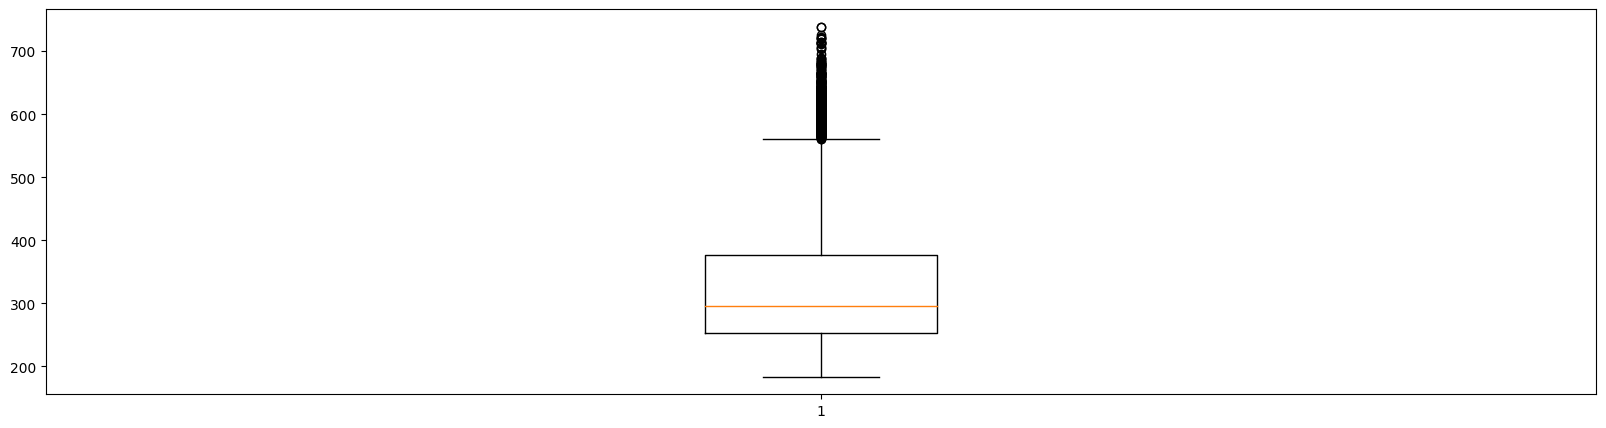

In [ ]:
plt.figure(figsize=(20,5))
plt.boxplot(data=df,x="MajorAxisLength",vert=True)

In [ ]:
#finding the outliers in MajorAxisLength
not_df_out_MAL, df_out_MAL = detect_outliers('MajorAxisLength')
print(f'Outliers in MajorAxisLength represent the {round((df_out_MAL.shape[0]*100)/df.shape[0], 2)}% of our dataset')
df_out_MAL["MajorAxisLength"].describe()

Outliers in MajorAxisLength represent the 2.8% of our dataset


count    379.000000
mean     617.680703
std       38.742634
min      561.529051
25%      584.480567
50%      614.272626
75%      641.492588
max      738.860153
Name: MajorAxisLength, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f098b72cfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f098b72ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f098b72cc70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f098d4a0dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f098d4a08e0>],
 'means': []}

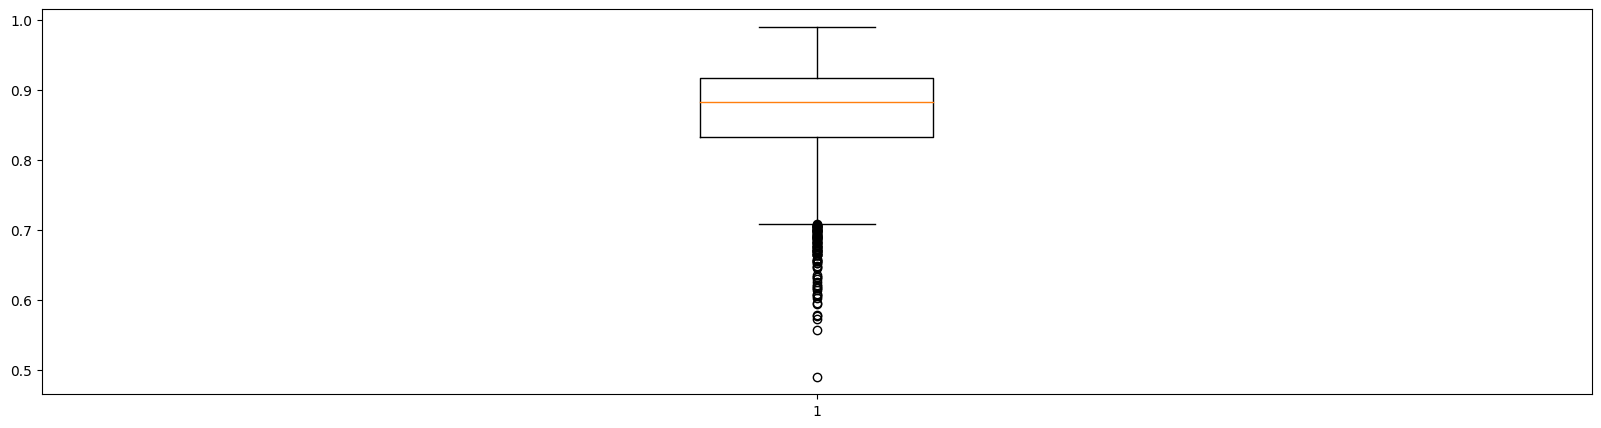

In [ ]:
plt.figure(figsize=(20,5))
plt.boxplot(data=df,x="roundness",vert=True)

In [ ]:
#finding the outliers in roundness
not_df_out_MAL, df_out_MAL = detect_outliers('roundness')
print(f'Outliers in roundness represent the {round((df_out_MAL.shape[0]*100)/df.shape[0], 2)}% of our dataset')
df_out_MAL["roundness"].describe()

Outliers in roundness represent the 0.72% of our dataset


count    98.000000
mean      0.665169
std       0.039920
min       0.489618
25%       0.652621
50%       0.675909
75%       0.693350
max       0.707810
Name: roundness, dtype: float64

Text(0.5, 1.0, 'Area vs roundness')

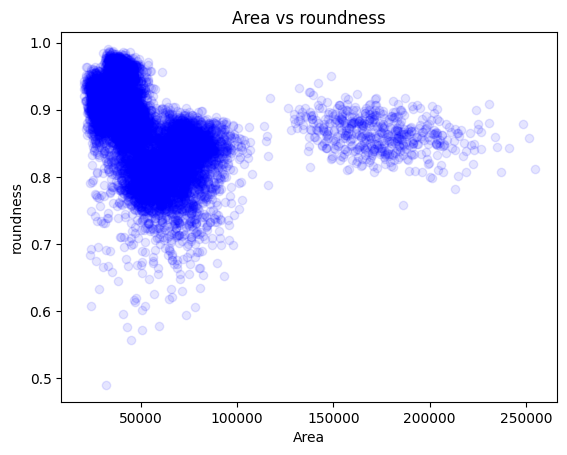

In [ ]:
#visualizing graphs
plt.xlabel("Area")
plt.ylabel("roundness")
plt.scatter(data=df,x="Area",y="roundness",c="blue",alpha=0.1)
plt.title("Area vs roundness")

In [ ]:
import plotly.express as px

In [ ]:
px.scatter(data_frame=df,x="Area",y="Solidity",color="Class")

label encoding the Class col

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df["Class"]=le.fit_transform(df["Class"])
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

       Class  
0          5  
1          5  
2          5  
3          5  
4          5  
...      ...  
13606      3  
13607      3  
13608      3  
13609      3  
13610      3  

[13543 rows x 17 columns]

In [ ]:
print(le.classes_)

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


**IN ABOVE CODE WE HAVE CONVERTED THE CLASS COL INTO INT FORMAT USING LABEL ENCODER**

In [ ]:
#data binning
df_bin = df.copy()
for feature in Continuous_col:
    bins = 14
    df_bin[feature] = pd.cut(df[feature], bins=bins, labels=range(bins)).astype(np.int64)
df_bin

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0         0          0                0                2             1   
1         0          1                0                2             0   
2         0          0                0                2             1   
3         0          1                0                2             1   
4         0          0                0                2             0   
...     ...        ...              ...              ...           ...   
13606     1          2                2                2             5   
13607     1          2                2                2             4   
13608     1          2                2                2             4   
13609     1          2                2                2             4   
13610     1          2                2                2             5   

       Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  roundness  \
0          0.549812       28715              0       9        12         13   
1          0.411785       29172              1      10        12         11   
2          0.562727       29690              1      10        13         12   
3          0.498616       30724              1      10        10         11   
4          0.333680       30417              1       9        13         13   
...             ...         ...            ...     ...       ...        ...   
13606      0.765002       42508              2       7        13         11   
13607      0.735702       42494              2      11        13         12   
13608      0.734065       42569              2       7        13         11   
13609      0.741055       42667              2       6        12         11   
13610      0.786693       42600              2      10        13         11   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0               11             8            11            10            13   
1               12             7            13            12            13   
2               10             8            11            10            13   
3               11             7            11            11            12   
4               13             7            13            13            13   
...            ...           ...           ...           ...           ...   
13606            6             7             5             5            13   
13607            7             7             5             6            13   
13608            7             7             5             6            13   
13609            7             7             5             6            12   
13610            5             7             4             5            13   

       Class  
0          5  
1          5  
2          5  
3          5  
4          5  
...      ...  
13606      3  
13607      3  
13608      3  
13609      3  
13610      3  

[13543 rows x 17 columns]

KeyboardInterrupt: ignored

<Figure size 2000x4000 with 0 Axes>

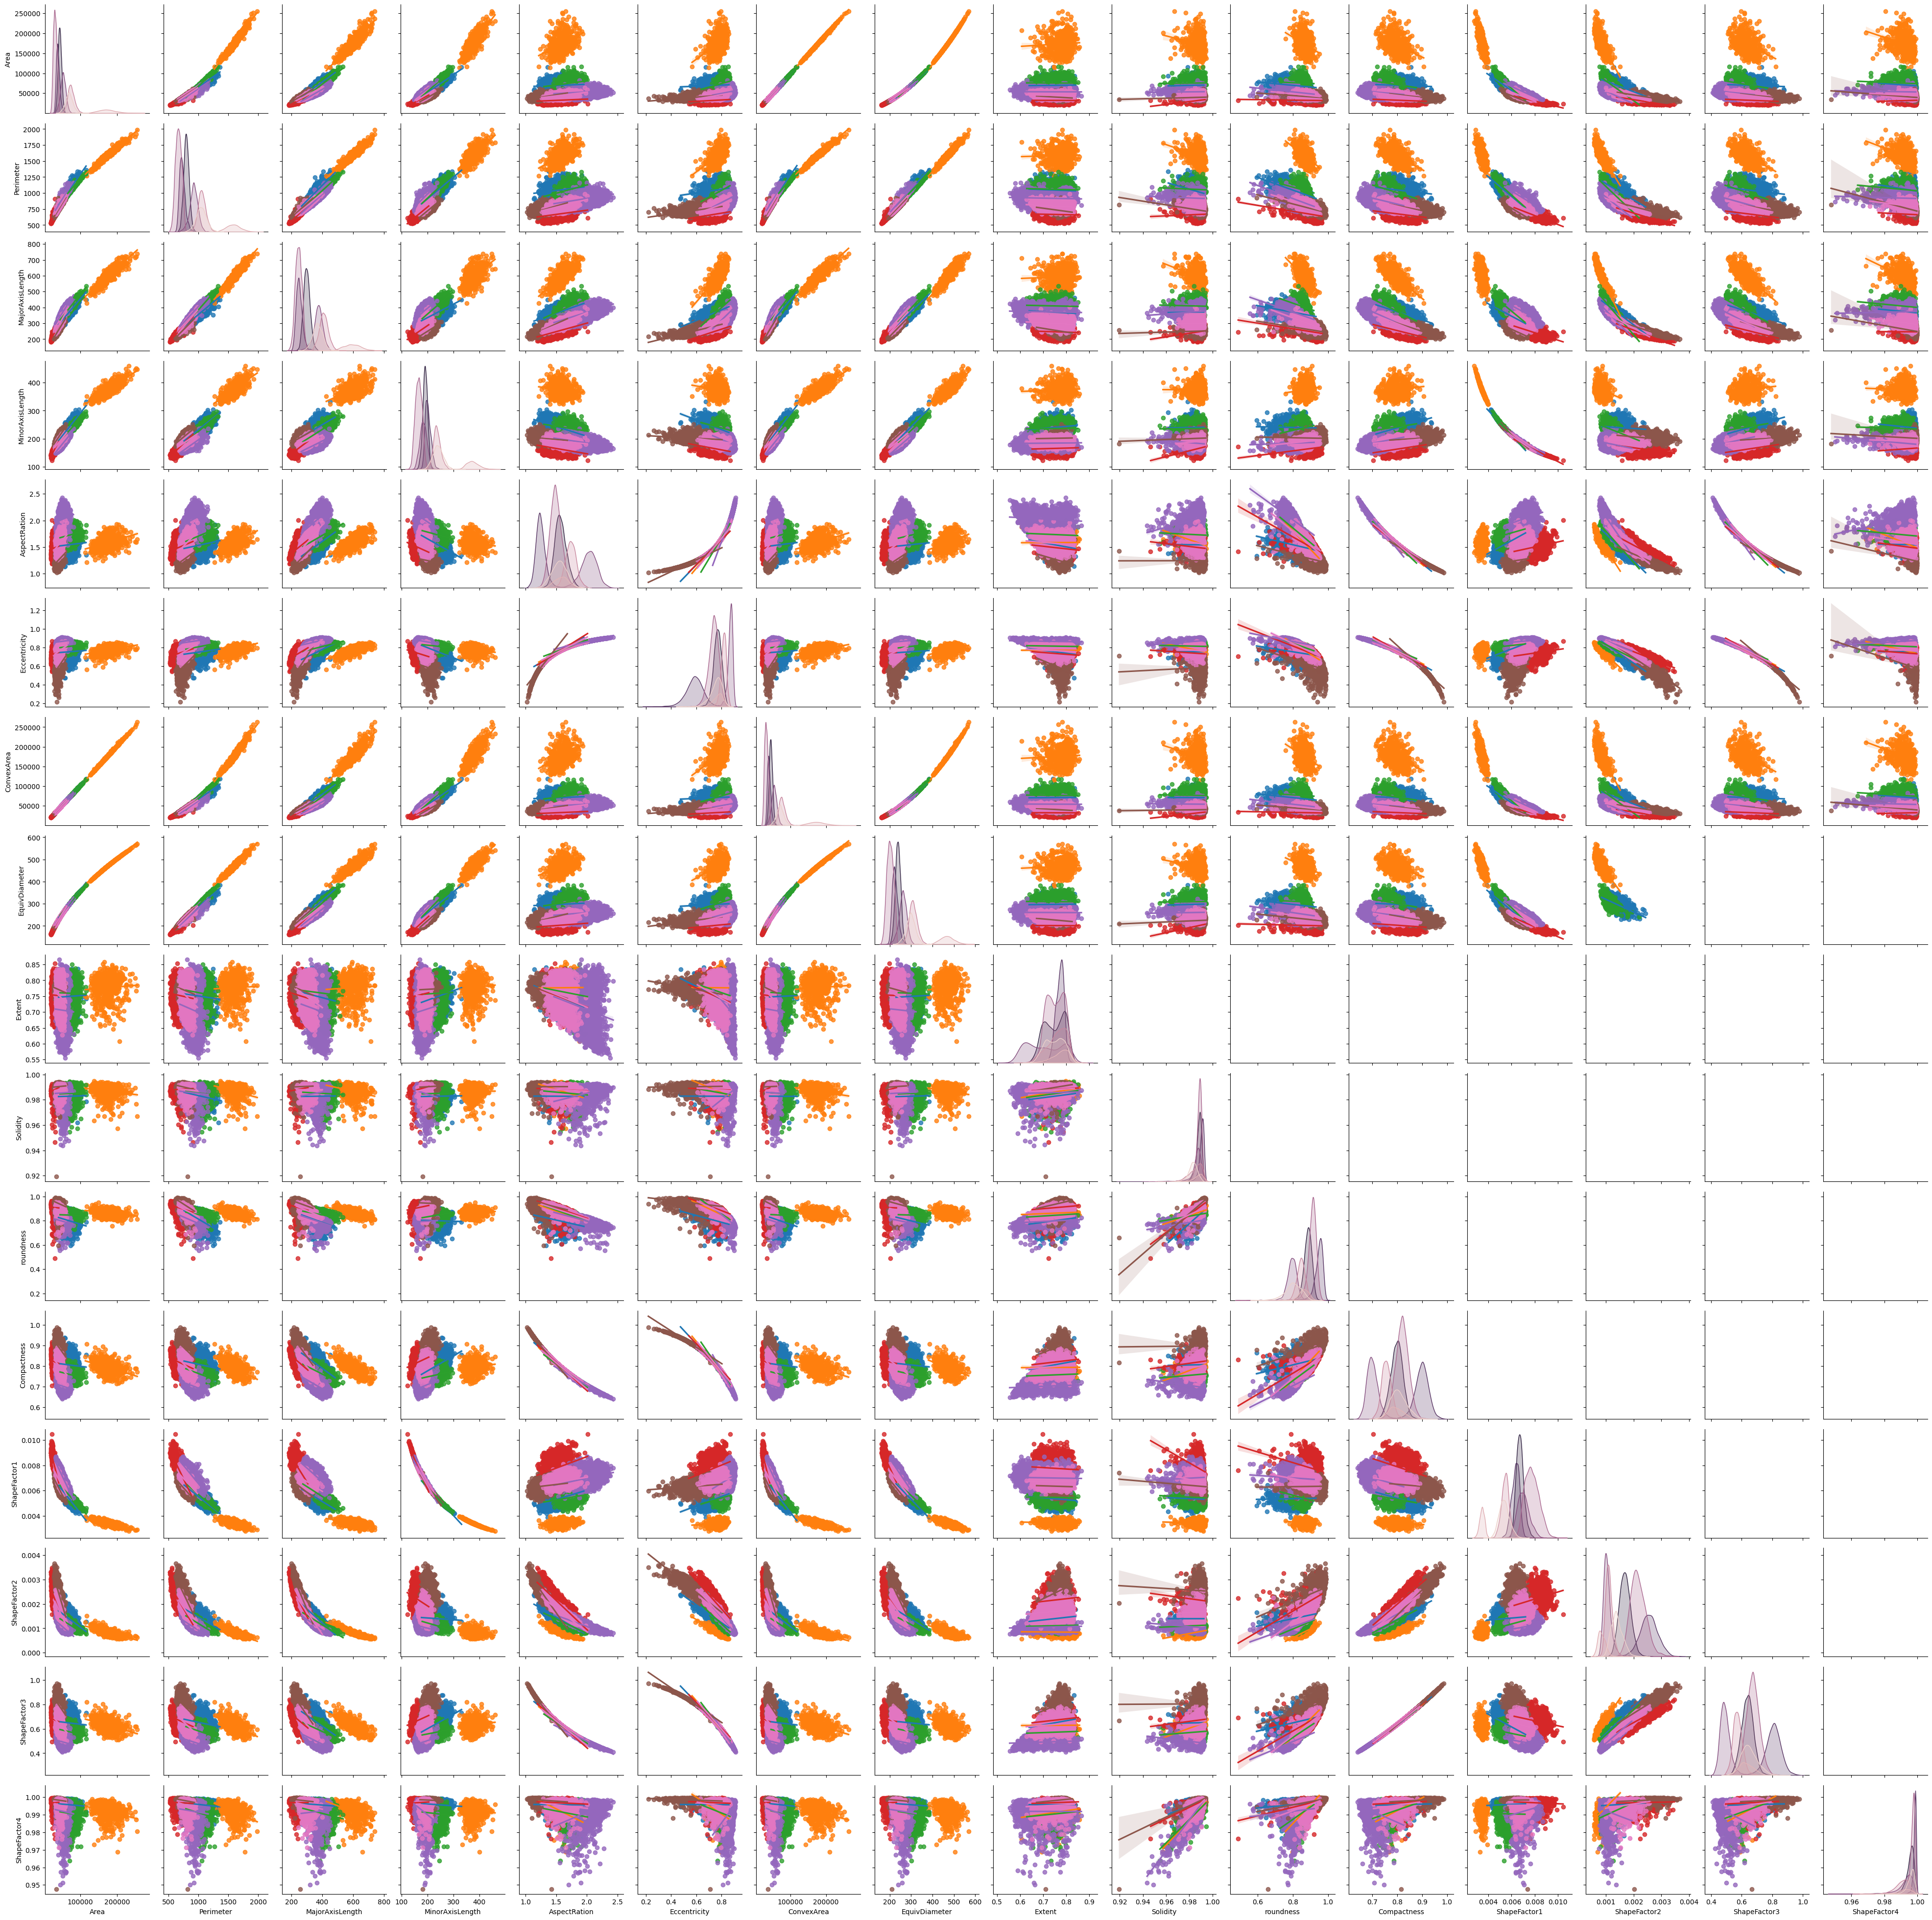

In [ ]:
plt.figure(figsize=(20,40))
sns.pairplot(data=df,hue="Class",kind="reg")

**Applying One hot ecoding**

In [ ]:
df_dumm = pd.get_dummies(df_bin, columns = Categorical_col+Continuous_col)
df_dumm

Eccentricity  ConvexArea  Class_0  Class_1  Class_2  Class_3  Class_4  \
0          0.549812       28715        0        0        0        0        0   
1          0.411785       29172        0        0        0        0        0   
2          0.562727       29690        0        0        0        0        0   
3          0.498616       30724        0        0        0        0        0   
4          0.333680       30417        0        0        0        0        0   
...             ...         ...      ...      ...      ...      ...      ...   
13606      0.765002       42508        0        0        0        1        0   
13607      0.735702       42494        0        0        0        1        0   
13608      0.734065       42569        0        0        0        1        0   
13609      0.741055       42667        0        0        0        1        0   
13610      0.786693       42600        0        0        0        1        0   

       Class_5  Class_6  Area_0  ...  ShapeFactor4_4  ShapeFactor4_5  \
0            1        0       1  ...               0               0   
1            1        0       1  ...               0               0   
2            1        0       1  ...               0               0   
3            1        0       1  ...               0               0   
4            1        0       1  ...               0               0   
...        ...      ...     ...  ...             ...             ...   
13606        0        0       0  ...               0               0   
13607        0        0       0  ...               0               0   
13608        0        0       0  ...               0               0   
13609        0        0       0  ...               0               0   
13610        0        0       0  ...               0               0   

       ShapeFactor4_6  ShapeFactor4_7  ShapeFactor4_8  ShapeFactor4_9  \
0                   0               0               0               0   
1                   0               0               0               0   
2                   0               0               0               0   
3                   0               0               0               0   
4                   0               0               0               0   
...               ...             ...             ...             ...   
13606               0               0               0               0   
13607               0               0               0               0   
13608               0               0               0               0   
13609               0               0               0               0   
13610               0               0               0               0   

       ShapeFactor4_10  ShapeFactor4_11  ShapeFactor4_12  ShapeFactor4_13  
0                    0                0                0                1  
1                    0                0                0                1  
2                    0                0                0                1  
3                    0                0                1                0  
4                    0                0                0                1  
...                ...              ...              ...              ...  
13606                0                0                0                1  
13607                0                0                0                1  
13608                0                0                0                1  
13609                0                0                1                0  
13610                0                0                0                1  

[13543 rows x 202 columns]

**Correlations between features and label**

In [ ]:
df_corr = df_dumm.corr()
df_corr["Class_0"].sort_values(ascending=False)

Class_0              1.000000
ShapeFactor1_4       0.389453
EquivDiameter_4      0.382122
ShapeFactor2_3       0.377978
MinorAxisLength_5    0.363729
                       ...   
Area_0              -0.202513
MajorAxisLength_1   -0.203526
Solidity_13         -0.218513
Area_1              -0.227785
MinorAxisLength_2   -0.236137
Name: Class_0, Length: 202, dtype: float64

<h1>**Training and Testing set split**</h1>

In [ ]:
X=df.drop(["Class"],axis=1)
y=df["Class"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print("--train set_x--",len(X_train),"--test set_x--",len(X_test),"--train set_y--",len(y_train),"--test set_y--",len(y_test))

--train set_x-- 10834 --test set_x-- 2709 --train set_y-- 10834 --test set_y-- 2709


**Developing a model**

In [ ]:
cv=15
nfeature=len(X_train.columns)
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Poisitive Rate")

In [ ]:
def print_scores(y, y_pred):
    ac, pr, rc, f1 = accuracy_score(y, y_pred,average='micro')*100, precision_score(y, y_pred,average='micro')*100, recall_score(y, y_pred)*100, f1_score(y, y_pred, average='weighted')*100
    print(f"Accuracy:{ac}")
    print(f"Precision:{pr}")
    print(f"Recall:{rc}")
    print(f"F1-score:{f1}")
    return {'ac': ac, 'pr':pr, 'rc':rc, 'f1':f1}

# **Applying k-nearest Neighbour**

In [ ]:
param_grid = [{
    'n_neighbors':np.arange(5, 21),
    'weights':['uniform', 'distance'],
    'p':[1, 2],
}]

In [ ]:
knn_clf = KNeighborsClassifier()
grid_knn = GridSearchCV(knn_clf, param_grid, cv=cv, scoring="accuracy")
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                          'p': [1, 2], 'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [ ]:
best_knn_clf = grid_knn.best_estimator_
grid_knn.best_params_

{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

<Axes: >

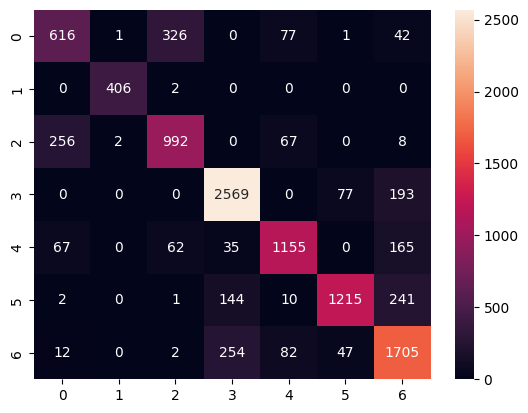

In [ ]:
y_train_pred = cross_val_predict(best_knn_clf, X_train, y_train, cv=cv)
conf_mx = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

In [ ]:
knn_clf = KNeighborsClassifier()
grid_knn = GridSearchCV(knn_clf, param_grid, cv=cv)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                          'p': [1, 2], 'weights': ['uniform', 'distance']}])